# Store Item Demand Forecasting Challenge

<a href="https://www.kaggle.com/c/demand-forecasting-kernels-only">Link to competition on Kaggle.</a>

In this notebook, a number of time series forecasting techniques of varying levels of sophistication are presented.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 99
plt.rcParams['figure.figsize'] = (16, 9)

## Load Data

In [2]:
df_train = pd.read_csv('data/train.csv', parse_dates=[0])
df_test = pd.read_csv('data/test.csv', parse_dates=[0])
df_train.shape, df_test.shape

((913000, 4), (45000, 4))

In [3]:
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


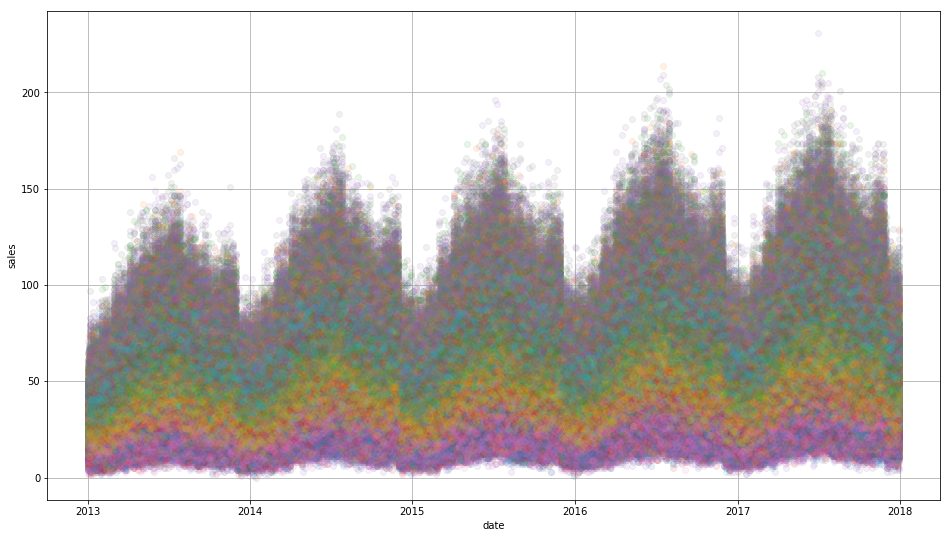

In [15]:
for s in df_train['store'].unique():
    for i in df_train['item'].unique():
        t = df_train.loc[(df_train['store'] == s) & (df_train['item'] == i)]
        plt.plot_date(t['date'], t['sales'], alpha=0.1)
plt.grid()
plt.xlabel('date')
plt.ylabel('sales');

## Average Method

For our first and simplest model, we make our predictions using the average value from the historical data.

In [5]:
am_results = df_test.copy()
am_results['sales'] = 0

for s in am_results['store'].unique():
    for i in am_results['item'].unique():
        historical_average = df_train.loc[(df_train['store'] == s) & (df_train['item'] == i), 'sales'].mean()
        am_results.loc[(am_results['store'] == s) & (am_results['item'] == i), 'sales'] = historical_average

In [6]:
am_results.drop(['date', 'store', 'item'], axis=1, inplace=True)
am_results.head()

,id,sales
0,0,19.971522
1,1,19.971522
2,2,19.971522
3,3,19.971522
4,4,19.971522


In [7]:
am_results.to_csv('am_results.csv', index=False)

Scores 28.35111 on the leaderboard.

## Seasonal Naive Method

For this model, we predict the value from the same time the previous year.

In [8]:
snm_results = df_test.copy()
snm_results['date'] = snm_results['date'].astype(np.datetime64)
snm_results['sales'] = 0

In [9]:
import datetime

prev_dates = snm_results.loc[(snm_results['store'] == 1) & (snm_results['item'] == 1), 'date'] - datetime.timedelta(days=365)

In [10]:
for s in snm_results['store'].unique():
    for i in snm_results['item'].unique():
        snm_results.loc[(snm_results['store'] == s) & (snm_results['item'] == i), 'sales'] = \
            df_train.loc[((df_train['store'] == s) & (df_train['item'] == i)) & (df_train['date'].isin(prev_dates)), 'sales'].values

In [11]:
snm_results.drop(['date', 'store', 'item'], axis=1, inplace=True)
snm_results.head()

,id,sales
0,0,19
1,1,15
2,2,10
3,3,16
4,4,14


In [12]:
snm_results.to_csv('snm_results.csv', index=False)

Scores 24.43958 on the leaderboard.